### TRAIN, VALID SET
#### 실제 제출한 엑셀파일에 대한 데이터는 조금더 내리시면 있는 TEST SET 파트에 있습니다.

In [16]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('IXI_train.csv')
df = df.dropna(axis=0)
df.tail()

,ID,Sex,Age,lbankssts,rbankssts,lcaudalanteriorcingulate,rcaudalanteriorcingulate,lcaudalmiddlefrontal,rcaudalmiddlefrontal,lcuneus,...,rsupramarginal,lfrontalpole,rfrontalpole,ltemporalpole,rtemporalpole,ltransversetemporal,rtransversetemporal,linsula,rinsula,ICV
475,IXI648,1.0,48.0,2.243393,2.183625,2.091777,2.318040,2.217503,2.320092,1.710408,...,2.283672,2.108798,2.217427,3.302149,2.839342,1.814112,2.104551,2.813649,2.832365,1550.69
476,IXI651,1.0,50.0,2.348476,2.361346,2.414400,2.395329,2.519391,2.577187,1.941617,...,2.350842,2.353198,2.366967,3.370918,3.528548,2.200643,2.184723,2.784420,2.727373,1319.96
477,IXI652,1.0,43.0,2.270474,2.522323,2.347463,2.306996,2.504811,2.711216,1.836631,...,2.473270,2.412033,2.543289,3.301938,3.214115,2.349575,2.212611,2.698898,2.859744,1645.44
478,IXI653,1.0,46.0,2.459036,2.748980,2.401849,2.382830,2.668507,2.610500,1.888133,...,2.606159,2.674906,2.782956,3.896701,3.349605,2.325811,2.343885,2.738962,3.032838,1564.28
480,IXI662,1.0,42.0,2.301829,2.538058,2.700542,2.241334,2.431643,2.415622,1.724104,...,2.384441,2.868533,2.812912,3.489476,3.755979,2.136605,2.201431,3.009863,3.159037,1733.92


In [17]:
X = df.drop(['Age','ID'], axis=1)
y = df['Age']
y

0      36.0
1      39.0
2      47.0
3      34.0
4      24.0
       ... 
475    48.0
476    50.0
477    43.0
478    46.0
480    42.0
Name: Age, Length: 463, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

param_grid = {'learning_rate': [.5, .2, .1, .05, .02, .01, .001]}
grid = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, cv=10,
                   return_train_score=True)
grid.fit(x_train, y_train)
print(grid.score(x_train, y_train))
print(grid.score(x_test, y_test))

0.9807171705826535
0.6511534945219758


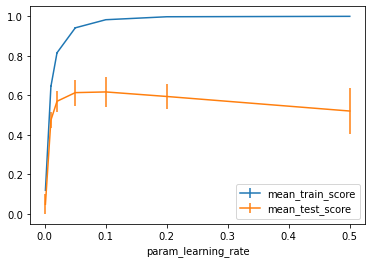

In [19]:
scores = pd.DataFrame(grid.cv_results_)

scores.plot(x='param_learning_rate', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_learning_rate', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

In [20]:
grid.best_params_

{'learning_rate': 0.1}

In [21]:
gsgb = GradientBoostingRegressor(random_state = 1228,learning_rate = 0.1)
gsgb.fit(x_train, y_train)
print("train score : ", gsgb.score(x_train, y_train))
print("valid score : ", gsgb.score(x_test, y_test))
print("learning rate : ", gsgb.learning_rate)

train score :  0.9807171705826535
valid score :  0.6523826180270578
learning rate :  0.1


In [22]:
print(gsgb.score(x_train, y_train))

print(gsgb.score(x_test, y_test))

train_predict = gsgb.predict(x_train)
y_predict = gsgb.predict(x_test)

print(y_predict)

print("=====train=====")
count = 0
a = np.array(train_predict)
b = np.array(y_train)
for i in range(len(a)):
    count = count + abs(a[i] - b[i])
    print(a[i]," ",b[i]," ")
    print(" ")
print(count)
print(" ")
print(" ")
print("=====valid=====")
print(" ")
count2 = 0
a = np.array(y_predict)
b = np.array(y_test)
for i in range(len(a)):
    count2 = count2 + abs(a[i] - b[i])
    print(a[i]," ",b[i]," ")
    print(" ")
print(count2)

0.9807171705826535
0.6523826180270578
[47.73679149 47.01654425 59.14812513 39.96772535 29.7279187  41.31067173
 29.7131151  36.81775595 48.72827753 59.88665427 72.9033867  34.85785034
 37.54209423 72.76229413 55.51972763 68.75075562 28.67033605 33.3008386
 33.36720873 48.19211597 38.16263066 36.77047825 34.03660343 29.55519118
 73.85089179 55.51177804 58.79418959 46.46330628 39.79446338 60.10790648
 53.47861299 61.66152238 58.0302004  55.59791505 60.98919541 35.3035119
 32.77136669 27.70833573 50.09088928 69.10268882 45.1189067  68.17736714
 24.82040292 35.37534058 65.60073225 46.89504911 66.05963889 30.1276811
 39.06453644 33.76779451 57.74235609 24.83899163 39.42296434 30.12328969
 27.40012958 58.70438956 41.97411386 60.91798797 57.4176337  64.18724128
 56.18617203 67.61010855 62.88519575 61.66925015 53.54573811 38.42313706
 31.69453806 56.79681376 50.59451437 31.09354316 47.44023193 31.58275786
 57.97070226 25.04977192 29.40529472 60.32436109 51.98874681 59.91121878
 71.25823193 48.

25.150840575349264   21.0  
 
50.885734664383364   52.0  
 
75.00787171836565   76.0  
 
69.77405210244945   68.0  
 
63.518095376690525   65.0  
 
36.063847526371035   31.0  
 
70.38014271202722   72.0  
 
75.15140105788696   80.0  
 
63.86881790226466   60.0  
 
63.84894027752103   64.0  
 
28.93665495722503   30.0  
 
68.50766654749188   70.0  
 
27.83763364807452   26.0  
 
44.89444631966855   38.0  
 
25.16181120182328   21.0  
 
64.20818905392791   67.0  
 
46.78009614910407   48.0  
 
71.14175162025639   73.0  
 
59.59654348472164   64.0  
 
70.25784978773464   68.0  
 
34.546792582679316   34.0  
 
24.00783424176429   21.0  
 
26.22097726915621   26.0  
 
29.912935125208712   32.0  
 
45.15362597479174   42.0  
 
68.9322761570451   71.0  
 
24.58160602431877   26.0  
 
27.65521575310123   25.0  
 
40.046963217445374   41.0  
 
43.911260490915346   44.0  
 
61.67782845752789   62.0  
 
67.56583384752021   68.0  
 
58.48102476702756   58.0  
 
33.17002490473201   33.0  
 
32.8643

## TEST SET 예측

### IXI TEST

In [23]:
df_test = pd.read_csv('IXI_test.csv')

df_test.tail()

,ID,Sex,Age,lbankssts,rbankssts,lcaudalanteriorcingulate,rcaudalanteriorcingulate,lcaudalmiddlefrontal,rcaudalmiddlefrontal,lcuneus,...,rsupramarginal,lfrontalpole,rfrontalpole,ltemporalpole,rtemporalpole,ltransversetemporal,rtransversetemporal,linsula,rinsula,ICV
95,IXI630,1,NaN,2.309919,2.720819,2.240877,2.799287,2.485604,2.530861,1.775716,...,2.447796,2.350621,2.533035,2.640564,3.316514,1.810387,1.899857,2.845032,2.996843,1493.36
96,IXI631,1,NaN,2.572835,2.550044,2.306126,2.464327,2.495147,2.597123,1.729111,...,2.461257,2.809109,2.693415,3.364524,3.464737,2.334037,2.135897,2.896742,2.749936,1347.78
97,IXI633,1,NaN,2.436368,2.718728,2.065562,2.533191,2.646970,2.646025,1.858174,...,2.379496,2.557159,2.700598,3.479038,2.925837,2.476974,2.083262,2.916254,2.726852,1592.46
98,IXI636,1,NaN,2.194361,2.307785,2.321805,2.083017,2.290436,2.311691,1.835694,...,2.333550,2.650712,2.817666,3.245448,2.837669,2.147822,2.375119,2.607046,2.640521,1661.88
99,IXI644,1,NaN,2.653739,2.723121,2.488712,2.536925,2.553392,2.448991,1.632246,...,2.449904,2.742711,2.600612,3.556878,3.495129,2.370404,2.396449,3.027811,2.962561,1730.40


In [24]:
X_test = df_test.drop(['Age','ID'], axis=1)
#X = df.loc[:,['lcaudalmiddlefrontal','rcaudalmiddlefrontal','lparacentral','rparacentral','lparsopercularis','rparsopercularis','rparstriangularis','lpostcentral','rpostcentral','lprecentral','rprecentral','rrostralmiddlefrontal','lsuperiorfrontal','rsuperiorfrontal','ltransversetemporal','rtransversetemporal']]
Y_test = df_test['Age']
X_test.head()

,Sex,lbankssts,rbankssts,lcaudalanteriorcingulate,rcaudalanteriorcingulate,lcaudalmiddlefrontal,rcaudalmiddlefrontal,lcuneus,rcuneus,lentorhinal,...,rsupramarginal,lfrontalpole,rfrontalpole,ltemporalpole,rtemporalpole,ltransversetemporal,rtransversetemporal,linsula,rinsula,ICV
0,2,2.790918,2.860664,2.377023,2.694348,2.767666,2.746961,1.887981,1.818115,3.227798,...,2.563580,2.934798,2.925411,3.349163,3.106885,2.481392,2.391845,3.349330,3.176278,1257.57
1,1,2.594282,2.700979,2.458627,2.423396,2.742329,2.817457,1.737984,1.868933,3.214692,...,2.613335,2.751007,2.959820,3.667810,3.428951,2.370657,2.254736,3.067785,3.160975,1554.63
2,1,2.597014,2.674919,2.258676,2.016510,2.460518,2.367396,1.595580,1.567906,3.085235,...,2.332489,2.843313,2.465880,3.841134,3.152598,1.926546,1.782548,3.100923,3.101951,1468.54
3,2,2.520381,2.443344,2.236262,2.550456,2.453389,2.395759,1.772909,1.560250,3.093755,...,2.332510,2.426691,2.395207,3.659196,3.312159,2.337989,2.234992,2.824175,2.936322,1280.93
4,1,2.669905,2.510474,2.209484,2.374890,2.539132,2.601794,1.935135,1.775122,3.661498,...,2.611295,2.469409,2.648380,3.893395,3.600993,2.437859,2.511397,2.859236,2.982760,1708.56


In [25]:
gsgb.fit(x_train, y_train)

test_predict = gsgb.predict(X_test)


count2 = 0
a = np.array(test_predict)
for i in range(len(a)):
    print(round(a[i]))
    count2 = count2 + 1
print(count2)

34.0
30.0
72.0
59.0
35.0
38.0
25.0
29.0
28.0
34.0
58.0
31.0
35.0
29.0
54.0
34.0
59.0
49.0
32.0
28.0
45.0
26.0
59.0
69.0
33.0
53.0
61.0
39.0
28.0
37.0
38.0
54.0
73.0
37.0
42.0
73.0
32.0
56.0
36.0
29.0
60.0
64.0
60.0
55.0
45.0
64.0
50.0
45.0
47.0
47.0
41.0
27.0
56.0
56.0
41.0
33.0
31.0
64.0
54.0
31.0
50.0
59.0
46.0
57.0
67.0
69.0
66.0
63.0
32.0
68.0
45.0
67.0
27.0
67.0
43.0
37.0
59.0
70.0
42.0
69.0
66.0
63.0
66.0
48.0
72.0
43.0
39.0
54.0
28.0
30.0
46.0
32.0
58.0
48.0
41.0
72.0
40.0
42.0
56.0
49.0
100


### COBRE TEST

In [26]:
df_test_CO = pd.read_csv('COBRE_test_scz.csv')

df_test_CO.head()

,ID,Age,Sex,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,...,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,ICV
0,40000,NaN,2,2.637,2.462,2.755,2.037,3.870,2.830,2.566,...,2.555,2.809,2.202,2.834,2.518,2.949,3.401,2.411,2.908,1376372.945
1,40001,NaN,1,2.449,2.379,2.553,1.969,3.567,2.590,2.463,...,2.450,2.657,2.142,2.688,2.476,2.730,3.519,2.147,2.737,1450970.104
2,40002,NaN,1,2.516,2.593,2.586,1.875,3.516,2.573,2.376,...,2.268,2.726,2.096,2.637,2.483,2.627,3.653,2.435,3.018,1455186.664
3,40003,NaN,1,2.458,2.695,2.654,1.779,3.270,2.605,2.458,...,2.256,2.598,2.164,2.783,2.544,2.616,3.925,2.018,3.217,1798564.922
4,40004,NaN,1,2.422,2.531,2.515,1.710,3.750,2.662,2.303,...,2.282,2.626,2.117,2.618,2.464,2.878,3.598,2.330,2.808,1678245.894


In [27]:
X_test

,Sex,lbankssts,rbankssts,lcaudalanteriorcingulate,rcaudalanteriorcingulate,lcaudalmiddlefrontal,rcaudalmiddlefrontal,lcuneus,rcuneus,lentorhinal,...,rsupramarginal,lfrontalpole,rfrontalpole,ltemporalpole,rtemporalpole,ltransversetemporal,rtransversetemporal,linsula,rinsula,ICV
0,2,2.790918,2.860664,2.377023,2.694348,2.767666,2.746961,1.887981,1.818115,3.227798,...,2.563580,2.934798,2.925411,3.349163,3.106885,2.481392,2.391845,3.349330,3.176278,1257.57
1,1,2.594282,2.700979,2.458627,2.423396,2.742329,2.817457,1.737984,1.868933,3.214692,...,2.613335,2.751007,2.959820,3.667810,3.428951,2.370657,2.254736,3.067785,3.160975,1554.63
2,1,2.597014,2.674919,2.258676,2.016510,2.460518,2.367396,1.595580,1.567906,3.085235,...,2.332489,2.843313,2.465880,3.841134,3.152598,1.926546,1.782548,3.100923,3.101951,1468.54
3,2,2.520381,2.443344,2.236262,2.550456,2.453389,2.395759,1.772909,1.560250,3.093755,...,2.332510,2.426691,2.395207,3.659196,3.312159,2.337989,2.234992,2.824175,2.936322,1280.93
4,1,2.669905,2.510474,2.209484,2.374890,2.539132,2.601794,1.935135,1.775122,3.661498,...,2.611295,2.469409,2.648380,3.893395,3.600993,2.437859,2.511397,2.859236,2.982760,1708.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2.309919,2.720819,2.240877,2.799287,2.485604,2.530861,1.775716,1.745676,2.972544,...,2.447796,2.350621,2.533035,2.640564,3.316514,1.810387,1.899857,2.845032,2.996843,1493.36
96,1,2.572835,2.550044,2.306126,2.464327,2.495147,2.597123,1.729111,1.826787,2.965628,...,2.461257,2.809109,2.693415,3.364524,3.464737,2.334037,2.135897,2.896742,2.749936,1347.78
97,1,2.436368,2.718728,2.065562,2.533191,2.646970,2.646025,1.858174,1.849504,2.617242,...,2.379496,2.557159,2.700598,3.479038,2.925837,2.476974,2.083262,2.916254,2.726852,1592.46
98,1,2.194361,2.307785,2.321805,2.083017,2.290436,2.311691,1.835694,1.777799,2.496998,...,2.333550,2.650712,2.817666,3.245448,2.837669,2.147822,2.375119,2.607046,2.640521,1661.88


In [28]:
for i in range(len(X.columns)):
    if(len(X.columns[i]) < 4):
        continue
    X = X.rename(columns={X.columns[i]: X.columns[i][0]+'h_'+X.columns[i][1:]+'_thickness'})
    

In [29]:
X_test_CO = df_test_CO.drop(['Age','ID'], axis=1)
X_test_CO['ICV'] = X_test_CO['ICV'] / 1000.0
Y_test = df_test_CO['Age']
X_test_CO.head()

,Sex,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,...,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,ICV
0,2,2.637,2.462,2.755,2.037,3.870,2.830,2.566,2.634,2.273,...,2.555,2.809,2.202,2.834,2.518,2.949,3.401,2.411,2.908,1376.372945
1,1,2.449,2.379,2.553,1.969,3.567,2.590,2.463,2.622,2.487,...,2.450,2.657,2.142,2.688,2.476,2.730,3.519,2.147,2.737,1450.970104
2,1,2.516,2.593,2.586,1.875,3.516,2.573,2.376,2.664,2.424,...,2.268,2.726,2.096,2.637,2.483,2.627,3.653,2.435,3.018,1455.186664
3,1,2.458,2.695,2.654,1.779,3.270,2.605,2.458,2.550,2.317,...,2.256,2.598,2.164,2.783,2.544,2.616,3.925,2.018,3.217,1798.564922
4,1,2.422,2.531,2.515,1.710,3.750,2.662,2.303,2.512,2.137,...,2.282,2.626,2.117,2.618,2.464,2.878,3.598,2.330,2.808,1678.245894


In [30]:
X_test_CO = X_test_CO[X.columns]

In [31]:
gsgb.fit(x_train, y_train)

test_predict = gsgb.predict(X_test_CO)


count2 = 0
a = np.array(test_predict)
for i in range(len(a)):
    print(round(a[i]))
    count2 = count2 + 1
print(count2)

34.0
50.0
53.0
70.0
45.0
57.0
62.0
66.0
51.0
42.0
58.0
57.0
49.0
59.0
61.0
62.0
43.0
46.0
59.0
41.0
50.0
46.0
60.0
50.0
59.0
67.0
58.0
57.0
33.0
39.0
55.0
49.0
59.0
52.0
56.0
42.0
62.0
74.0
60.0
48.0
47.0
47.0
55.0
37.0
65.0
60.0
58.0
67.0
69.0
59.0
36.0
46.0
57.0
42.0
72.0
69.0
47.0
64.0
53.0
72.0
61.0
46.0
57.0
53.0
59.0
57.0
51.0
48.0
47.0
44.0
62.0
33.0
72
